# Average Directional Index (ADX)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx

Average Directional Index (ADX) is technical indicator; as a result, the values range from 0 to 100. The ADX gives a signal of trend strength.

If ADX is below 20, the trend is weak; however, if ADX is above 50, the trend is strong. ADX does not tell you the direction of the trend and it only gives the strength of the trend.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [10]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


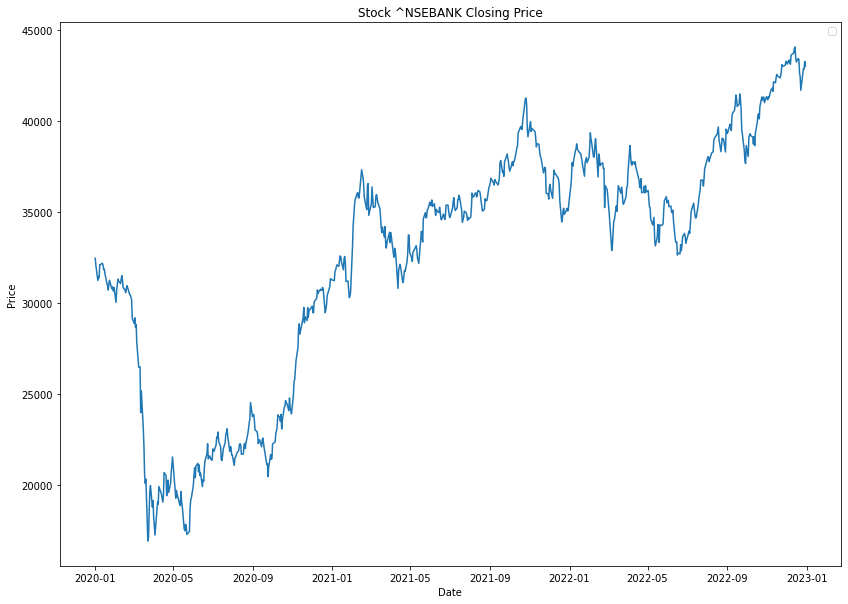

In [11]:
# Simple Line Chart
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.legend(loc='best')
plt.title('Stock '+ symbol +' Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [12]:
import talib as ta

In [13]:
adx = ta.ADX(df['High'], df['Low'],df['Adj Close'], timeperiod=14)
adx = adx.dropna()
adx

Date
2020-02-10 00:00:00+05:30    35.392043
2020-02-11 00:00:00+05:30    33.344315
2020-02-12 00:00:00+05:30    31.267570
2020-02-13 00:00:00+05:30    29.757578
2020-02-14 00:00:00+05:30    29.056138
                               ...    
2022-12-23 00:00:00+05:30    28.705454
2022-12-27 00:00:00+05:30    27.359855
2022-12-28 00:00:00+05:30    25.887246
2022-12-29 00:00:00+05:30    24.443179
2022-12-30 00:00:00+05:30    23.102259
Length: 716, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


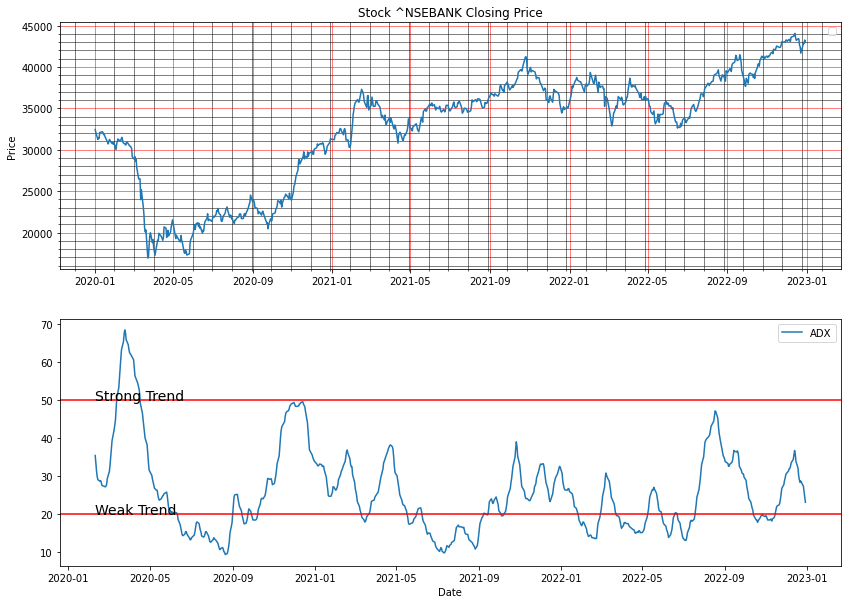

In [14]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
#ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with ADX

In [15]:
# Candlestick
dfc = df.copy()

from matplotlib import dates as mdates
import datetime as dt

dfc['ADX'] = ta.ADX(dfc['High'], dfc['Low'],dfc['Adj Close'], timeperiod=14)
dfc = dfc.dropna()
dfc.head()

,Open,High,Low,Close,Adj Close,Volume,ADX
Date,,,,,,,
2020-02-10 00:00:00+05:30,31248.650391,31248.800781,30957.199219,31058.150391,31057.789062,239700,35.392043
2020-02-11 00:00:00+05:30,31230.199219,31505.949219,31225.900391,31300.599609,31300.236328,198900,33.344315
2020-02-12 00:00:00+05:30,31441.150391,31588.599609,31398.150391,31492.900391,31492.535156,226000,31.267570
2020-02-13 00:00:00+05:30,31586.550781,31649.449219,31180.599609,31230.250000,31229.886719,303000,29.757578
2020-02-14 00:00:00+05:30,31281.849609,31436.650391,30776.099609,30834.800781,30834.443359,341400,29.056138


In [16]:
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADX
0,18301.770833,31248.650391,31248.800781,30957.199219,31058.150391,31057.789062,239700,35.392043
1,18302.770833,31230.199219,31505.949219,31225.900391,31300.599609,31300.236328,198900,33.344315
2,18303.770833,31441.150391,31588.599609,31398.150391,31492.900391,31492.535156,226000,31.267570
3,18304.770833,31586.550781,31649.449219,31180.599609,31230.250000,31229.886719,303000,29.757578
4,18305.770833,31281.849609,31436.650391,30776.099609,30834.800781,30834.443359,341400,29.056138


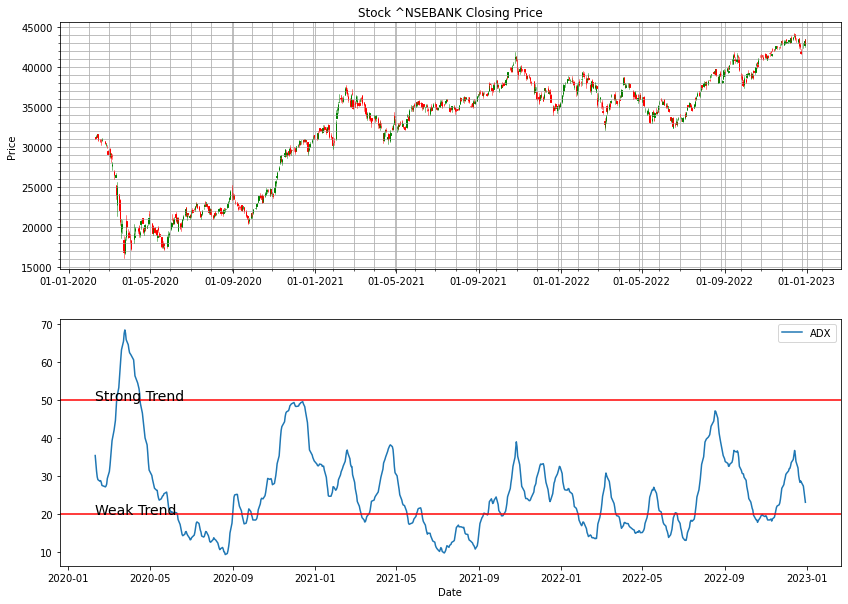

In [18]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
#ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')